In [242]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [243]:
!cp "/content/drive/MyDrive/Colab Notebooks/Bangladesh/Temp_and_rain.csv" "/content/bangladeshweather.csv"

In [244]:
df = pd.read_csv('/content/bangladeshweather.csv')
df

,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [245]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [246]:
#df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
#df[:25]

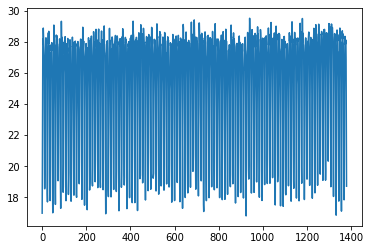

In [247]:
temp = df['tem']
temp.plot()

In [248]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [249]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [250]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1350, 30, 1), (1350,))

In [251]:
X_train1, y_train1 = X1[:1096], y1[:1096]
X_val1, y_val1 = X1[1096:1233], y1[1096:1233]
X_test1, y_test1 = X1[1233:], y1[1233:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1096, 30, 1), (1096,), (137, 30, 1), (137,), (117, 30, 1), (117,))

In [252]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((30, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(32, 'relu'))
model2.add(Dense(32, 'relu'))
model2.add(Dense(16, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 29, 64)            192       
                                                                 
 flatten_10 (Flatten)        (None, 1856)              0         
                                                                 
 dense_27 (Dense)            (None, 32)                59424     
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 61,217
Trainable params: 61,217
Non-tra

In [253]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [254]:
history1 = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp2])

Epoch 1/50
35/35 [==============================] - 2s 47ms/step - loss: 191.6060 - root_mean_squared_error: 13.8422 - val_loss: 12.7174 - val_root_mean_squared_error: 3.5661
Epoch 2/50
35/35 [==============================] - 1s 31ms/step - loss: 14.2971 - root_mean_squared_error: 3.7811 - val_loss: 11.8402 - val_root_mean_squared_error: 3.4410
Epoch 3/50
35/35 [==============================] - 1s 31ms/step - loss: 11.6474 - root_mean_squared_error: 3.4128 - val_loss: 10.6464 - val_root_mean_squared_error: 3.2629
Epoch 4/50
35/35 [==============================] - 1s 33ms/step - loss: 10.2650 - root_mean_squared_error: 3.2039 - val_loss: 9.1901 - val_root_mean_squared_error: 3.0315
Epoch 5/50
35/35 [==============================] - 1s 31ms/step - loss: 8.6168 - root_mean_squared_error: 2.9354 - val_loss: 7.6548 - val_root_mean_squared_error: 2.7667
Epoch 6/50
35/35 [==============================] - 1s 30ms/step - loss: 6.9934 - root_mean_squared_error: 2.6445 - val_loss: 6.1019 - v

In [255]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [256]:
train_predictions1 = model2.predict(X_train1).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y_train1})
train_results1

,Train Predictions,Actuals
0,27.878294,28.6851
1,27.880083,27.5889
2,27.810900,27.7468
3,26.104170,26.8644
4,22.168903,22.4298
...,...,...
1091,27.803179,28.0515
1092,27.665812,28.3919
1093,28.028191,28.3000
1094,27.897081,28.3021


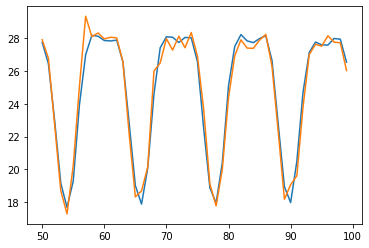

In [257]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [258]:
val_predictions1 = model2.predict(X_val1).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y_val1})
val_results1

,Val Predictions,Actuals
0,22.922377,23.1254
1,19.496679,19.0129
2,18.323763,17.7492
3,20.144688,20.8723
4,24.478357,25.2876
...,...,...
132,23.366676,23.3981
133,19.772738,20.1779
134,19.044142,19.4921
135,21.589476,23.6292


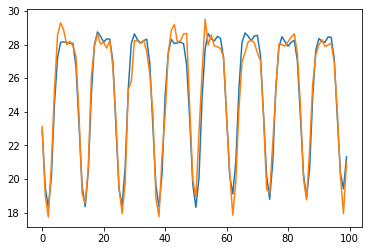

In [259]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [260]:
test_predictions1 = model2.predict(X_test1).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y_test1})
test_results1

,Test Predictions,Actuals
0,28.327250,27.6793
1,28.757402,28.4904
2,28.426931,28.4580
3,28.365778,28.6736
4,28.735796,28.6002
...,...,...
112,28.110306,28.0642
113,27.999949,28.1230
114,26.428057,26.8624
115,22.457924,23.1842


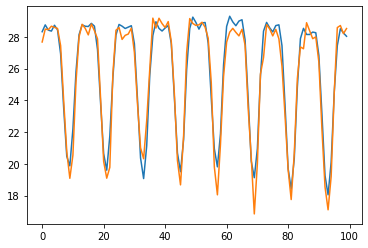

In [261]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

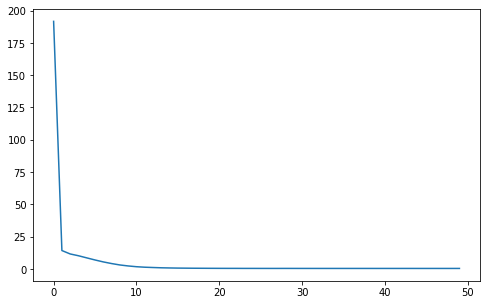

In [262]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

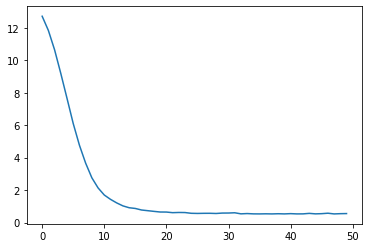

In [263]:
plt.plot(history1.history['val_loss'])

In [264]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(     Predictions  Actuals
 0      28.327250  27.6793
 1      28.757402  28.4904
 2      28.426931  28.4580
 3      28.365778  28.6736
 4      28.735796  28.6002
 ..           ...      ...
 112    28.110306  28.0642
 113    27.999949  28.1230
 114    26.428057  26.8624
 115    22.457924  23.1842
 116    18.646200  18.7124
 
 [117 rows x 2 columns], 0.46965406756116046)

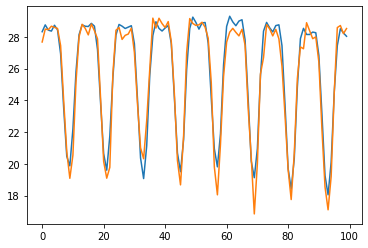

In [265]:
plot_predictions1(model2, X_test1, y_test1)